<a href="https://colab.research.google.com/github/NiliS2006/Linear-Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting Boston house prices using Linear Regression

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing important dependencies
from sklearn.model_selection import train_test_split
from sklearn import linear_model

Loading **California Housing** dataset

In [ ]:
housing= pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/20240319120216/housing.csv")
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
def find_correlation(housing_numeric):
  # a function for computing standard correlation coefficient
  corr_matrix = housing_numeric.corr()
  # which column is most related to house price
  # computes a correlation matrix, a table of pearson correlation coeeficients for every pair of numeric columns
  # values range from -1 to +1
  # fetch and return attribute correlates
  # with the median housing value

  return corr_matrix["median_house_value"].sort_values(ascending=False)
  # we pluck columns that shows how every other feature relates to median_house_value, the target
  # these relationships are ranked from top to bottom

# drop ocean_proximity column(non-numeric column)
housing_numeric = housing.drop("ocean_proximity", axis=1)
# find correlation coefficient
cor_coef = find_correlation(housing_numeric)
print("Correlation Coefficient::", cor_coef)

Correlation Coefficient:: median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


<Axes: xlabel='median_income', ylabel='median_house_value'>

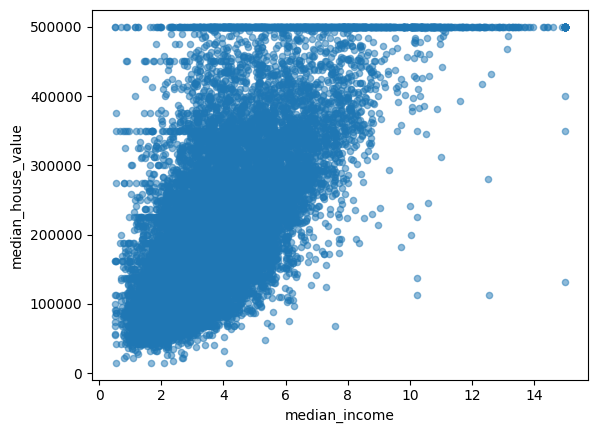

In [ ]:
# scatter plot diagram
housing.plot(kind='scatter', x="median_income", y="median_house_value",alpha=0.5)

Stratified sampling is used. right number of instances from each stratum are sampled to ensure that the test set represents the entire population. it is a smart way to split data to make sure every group is fairly represented.

array([[<Axes: title={'center': 'median_income'}>]], dtype=object)

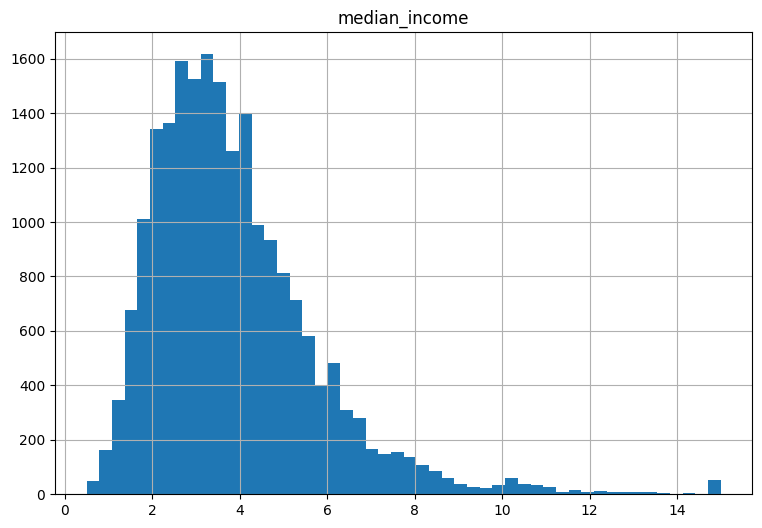

In [ ]:
housing.hist(column='median_income',bins=50, figsize=(9,6))
# bins meaning number of parts, making house values 50 equal width groups, then counting how many houses fall into each group.

<Axes: >

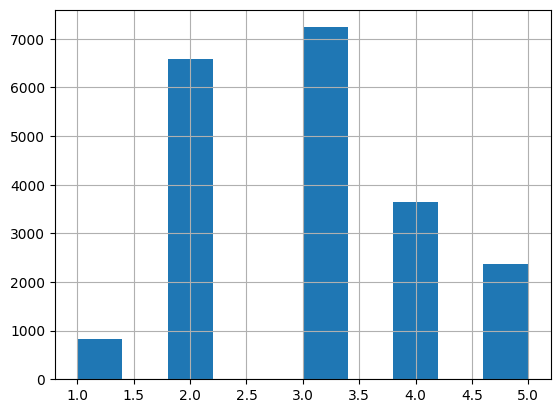

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()
# the cut-points 0-1.5-3.0-4.5-6-infinity(income labels)
# labels for every row to show income... how many districts are low, middle or high income?

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error

def fetch_housing_data():
  return pd.read_csv(
    "https://media.geeksforgeeks.org/wp-content/uploads/20240319120216/housing.csv")

In [ ]:
def set_income_category(housing_selected):
    # set income category based on median income
    housing_selected["income_cat"] = pd.cut(housing_selected["median_income"],
                                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                            labels=[1, 2, 3, 4, 5])
    return housing_selected

In [ ]:
def get_strat_train_test_dataset(housing_selected):
    # stratified sampling
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    # do split once
    # 20% of rows to test
    # 42 times split every run
    housing_split = split.split(housing_selected, housing_selected["income_cat"])
    # get train and test dataset, splits to get two array sets
    for train_index, test_index in housing_split:
        train_set = housing_selected.loc[train_index]
        # rows going into training
        test_set = housing_selected.loc[test_index]
        # rows going to testing
          # Return the train_set and test_set after the loop
    return train_set, test_set


In [ ]:
def sprt_train_and_label_set(train_set):
    # drop median_house_value from training data
    housing_tr = train_set.drop("median_house_value", axis=1)
    # create a new dataframe with median_house_value
    housing_labels = train_set["median_house_value"].copy()
    return housing_tr, housing_labels
    # housing_tr being features and housing_labels being labels

In [ ]:
def get_rmse(housing_labels, predicted_data):
    # get mean squared error to analyse prediction error
    mse = mean_squared_error(housing_labels, predicted_data)
    rmse = np.sqrt(mse)
    return rmse

In [ ]:
# get housing data
housing = fetch_housing_data()
# copy median_income and median_house_value
housing_selected = housing[['median_income', 'median_house_value']].copy()
# set income category based on median_icome
housing_selected = set_income_category(housing_selected)
# stratified sampling
train_set, test_set = get_strat_train_test_dataset(housing_selected)
# seperate label and data from training set
housing_tr, housing_labels = sprt_train_and_label_set(train_set)

In [ ]:
from sklearn.linear_model import LinearRegression
# linear regression model for best fit, a line or a hyperplane
lin_reg = LinearRegression()
lin_reg.fit(housing_tr, housing_labels)

# sample data to test from training set
sample_data = housing_tr.iloc[:5]
sample_labels = housing_labels.iloc[:5]
# iloc meaning index locations from [:5] which is 0 to 5th
# predict the median_house_value
predicted_data = lin_reg.predict(sample_data)
print("Predicted Price:", predicted_data)
print("Actual Price:", list(sample_labels))

Predicted Price: [133896.5552487  319795.13715872 158556.64451493 135752.91782819
 228732.32072569]
Actual Price: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
# pass the training data and identify the prediction error
predicted_data = lin_reg.predict(housing_tr)
lin_rmse = get_rmse(housing_labels, predicted_data)
print("root mean square error:", lin_rmse)

root mean square error: 83842.35815021694


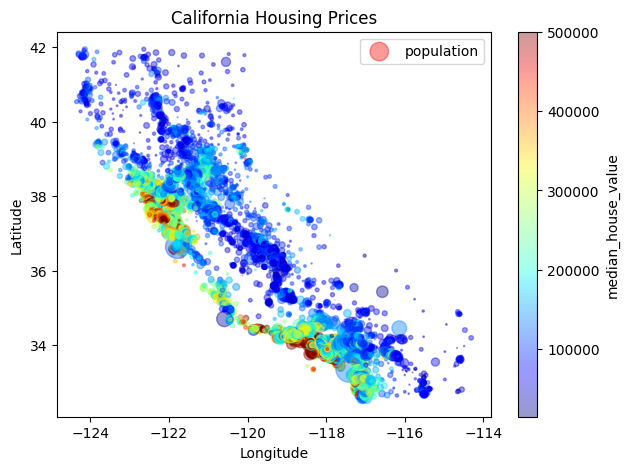

In [ ]:
# plot
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(7,5),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.title("California Housing Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
# jet colourmap is rainbow style colours
# s here stands for size based on poulation

In [ ]:
from sklearn.impute import SimpleImputer

# drop ocean_proximity column
housing_num = housing.drop("ocean_proximity", axis=1)

# imputer instance
imputer = SimpleImputer(strategy="median")
# if there are NaN values, then median values are looked into , used for missed data
imputer.fit(housing_num)
# remembers median number and stores internally
housing_imputer = imputer.transform(housing_num)
# a new numpy array is created where the missing data of that column has been replaced by its median value
print("Imputer return data type:", type(housing_imputer))

# convert back to pandas dataframe
housing_new = pd.DataFrame(housing_imputer, columns=housing_num.columns, index=housing_num.index)
print("New Housing Dataset:")
print(housing_new.info())

Imputer return data type: <class 'numpy.ndarray'>
New Housing Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def transformation_pipeline():
    # pipeline execution
    num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler())])
    # std_scaler rescales every numeric column to have mean 0 and std 1
    return num_pipeline

# get housing data
housing = fetch_housing_data()
# set income category based on median_icome
housing = set_income_category(housing)
# stratified sampling
train_set, test_set = get_strat_train_test_dataset(housing)
# seperate label and data from training set
housing_tr, housing_labels = sprt_train_and_label_set(train_set)
# drop ocean_proximity
housing_num = housing_tr.drop("ocean_proximity", axis=1)
# numeric pipeline execution
num_pipeline = transformation_pipeline()
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
from sklearn.linear_model import LinearRegression

# linear regression model to identify best fit
lin_reg = LinearRegression()
lin_reg.fit(housing_num_tr, housing_labels)
# pass the prepared data and predict the housing price
predicted_data = lin_reg.predict(housing_num_tr)
# pass the predicted data and identify the prediction error
lin_rmse = get_rmse(housing_labels, predicted_data)
print("Linear Regression Prediction error:", lin_rmse)

Linear Regression Prediction error: 69738.55757479477


In [ ]:
housing[["ocean_proximity"]].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# fetch ocean_proximity : 2 dimensional array
housing_cat = housing[["ocean_proximity"]]
# one hot encoder
cat_encoder = OneHotEncoder()
#encoding the columns into an array of numbers based on 0 and 1
housing_cat_encoder = cat_encoder.fit_transform(housing_cat)
# convert sparse matrix to array to dispaly the result
result = housing_cat_encoder.toarray()
print("Data:")
print(result)
category_list = cat_encoder.categories_
print("Category List::", category_list)

Data:
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
Category List:: [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
# one kind of recipe for numbers
cat_attribs = ["ocean_proximity"]
# another kind for text from the text containing column
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),("cat", OneHotEncoder(), cat_attribs),])
housing_prepared = full_pipeline.fit_transform(housing_tr)

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


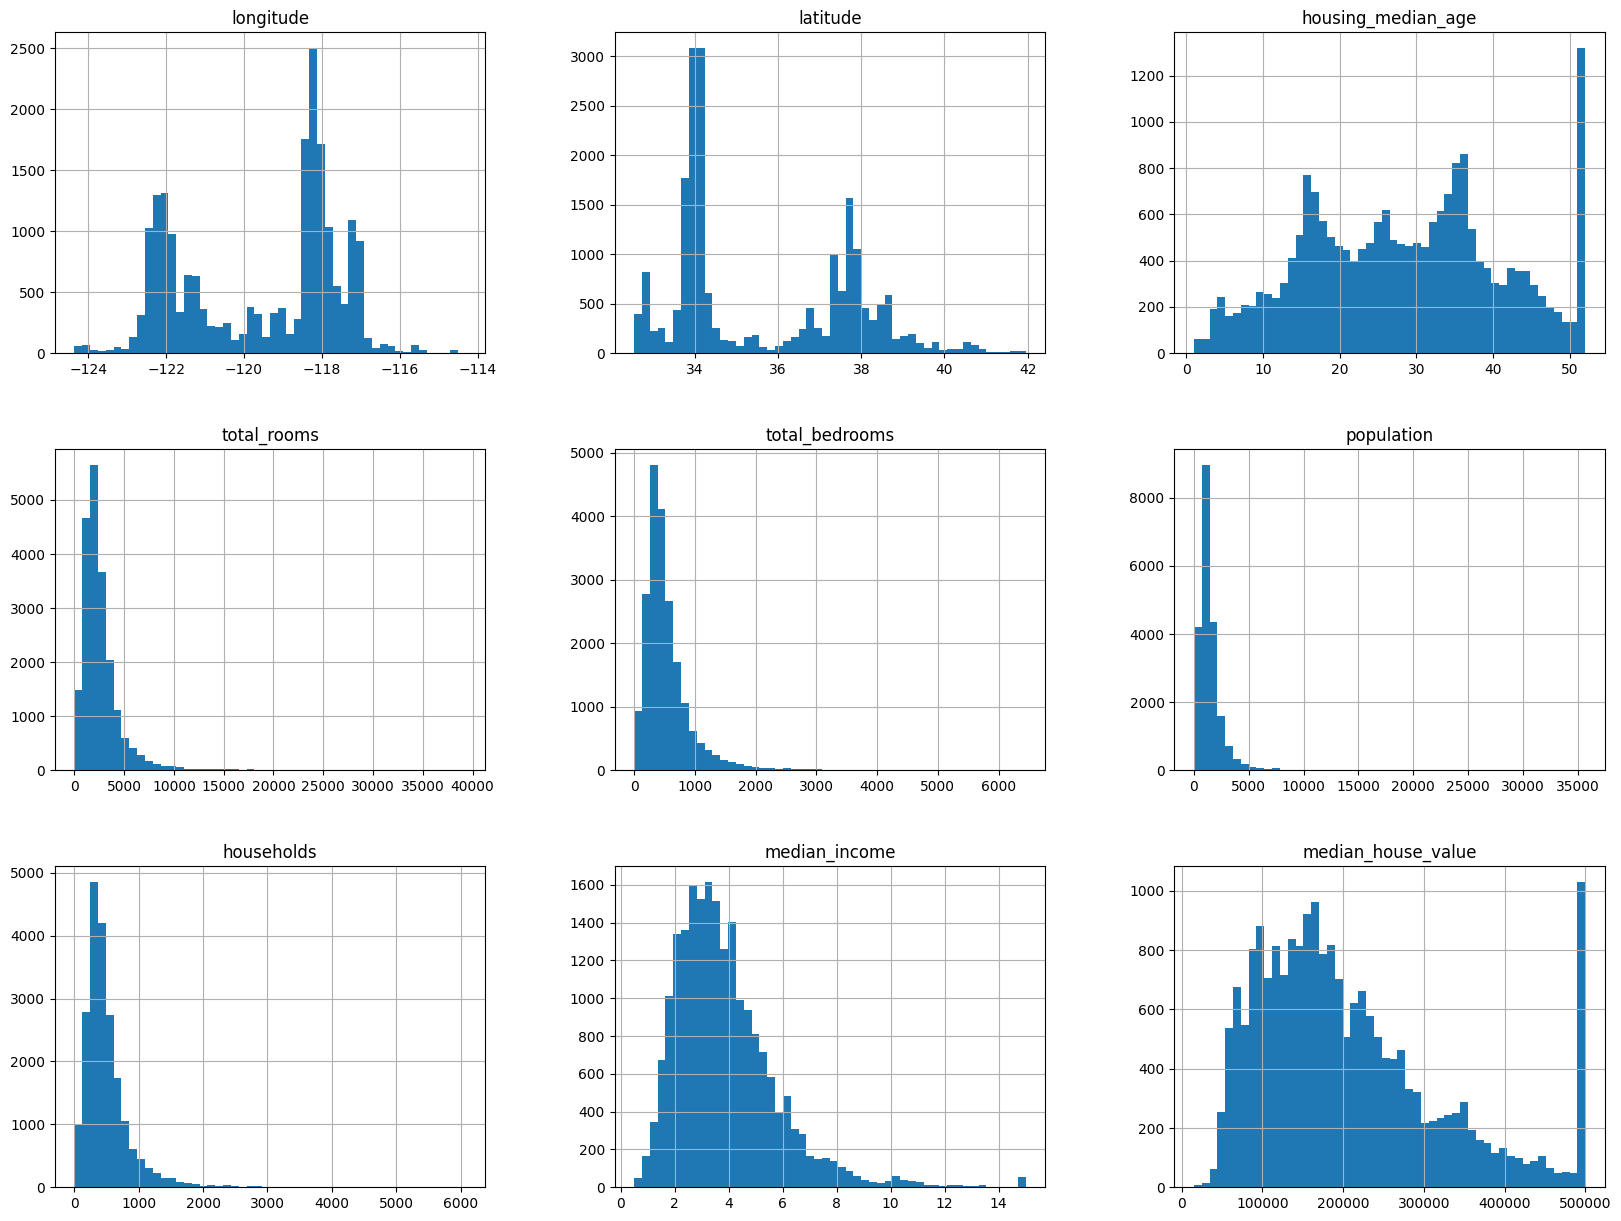

In [ ]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix,households_ix = 3, 4, 5, 6
# once the dataframe has been converted into a numpy matrix, the 4 integers tell the transformer where to find each numeric column
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
    # nothing to learn
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    # total rooms/households, higher means large or less crowd
    population_per_household = X[:, population_ix] / X[:, households_ix]
    # population/households, measures crowding
    bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
    # bedrooms/rooms, gives house layout or quality
    return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
    # np.c concatenates 3 fresh matrices into original matrix X

In [ ]:
def transformation_pipeline():
    # pipeline execution
    num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),('attribs_adder', CombinedAttributesAdder()),('std_scaler', StandardScaler())])
    return num_pipeline
# CombinedAttributesAdder() means to add 3 extra ratio columns
# imputing fills in missing numbers and standard scale means scaling every numeric value
def complete_pipeline(num_pipeline, num_attribs, cat_attribs):
    full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),("cat", OneHotEncoder(), cat_attribs)])
    return full_pipeline
# builds pipeline with 2 branches: num branch for numeric pipeline and cat branch for the text column ocean_proximity
# numeric pipeline execution
num_pipeline = transformation_pipeline()
num_attribs = list(housing_num) # names of numeric columns
cat_attribs = ["ocean_proximity"] # one text column
# pipeline execution of numeric and column attribute
full_pipeline = complete_pipeline(num_pipeline, num_attribs, cat_attribs)
housing_prepared = full_pipeline.fit_transform(housing_tr)
print("Housing Prepared Data:")
print(housing_prepared)
# now has no missing values, extra ratio features, scaled numeric data, one hot flags(binary columns) for text column

Housing Prepared Data:
[[-0.94135046  1.34743822  0.02756357 ...  0.          0.
   0.        ]
 [ 1.17178212 -1.19243966 -1.72201763 ...  0.          0.
   1.        ]
 [ 0.26758118 -0.1259716   1.22045984 ...  0.          0.
   0.        ]
 ...
 [-1.5707942   1.31001828  1.53856552 ...  0.          0.
   0.        ]
 [-1.56080303  1.2492109  -1.1653327  ...  0.          0.
   0.        ]
 [-1.28105026  2.02567448 -0.13148926 ...  0.          0.
   0.        ]]


In [ ]:
#pipeline lets chain data transforming steps together

# linear regression model to identify best fit
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
# pass the prepared data and predict the housing price
predicted_data = lin_reg.predict(housing_prepared)
# pass the predicted data and identify the prediction error
lin_rmse = get_rmse(housing_labels, predicted_data)
print("Linear Regression Prediction error:", lin_rmse)

Linear Regression Prediction error: 68376.51254853733
